TIME SERIES PREDICTION AOUT PROPERTY SALES IN USA
DATA PREPROCCESSING

1-DATA READING AND REDUCING THE NUMBER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('AKBANK.csv')
df_april=pd.read_csv('AKBNK-nisan-mayıs.csv')
print(df.head(5),'\n')
print(f"Shape of this dataframe is: {df.shape}")


        Tarih  Şimdi Açılış Yüksek  Düşük     Hac.  Fark %
0  26.06.2023  20,42  20,54  20,78  20,24  168,99M   3,18%
1  23.06.2023  19,79  19,44  20,14  19,44  255,23M   3,13%
2  22.06.2023  19,19  19,30  19,55  18,60  439,66M  -0,62%
3  21.06.2023  19,31  19,22  19,39  18,93  171,88M   1,42%
4  20.06.2023  19,04  18,51  19,23  18,39  214,51M   2,86% 

Shape of this dataframe is: (21, 7)


At first we check if dataframe is readable and the shape of dataframe. This first dataset consist of 21 row and 5 columns.
This is a small number to evaluate, so add also a few past months data also.

In [2]:
df=pd.concat([df, df_april])
dates=list(df['Tarih'])
dates#List of total timestamps AKBANK Share data.

['26.06.2023',
 '23.06.2023',
 '22.06.2023',
 '21.06.2023',
 '20.06.2023',
 '19.06.2023',
 '16.06.2023',
 '15.06.2023',
 '14.06.2023',
 '13.06.2023',
 '12.06.2023',
 '09.06.2023',
 '08.06.2023',
 '07.06.2023',
 '06.06.2023',
 '05.06.2023',
 '02.06.2023',
 '01.06.2023',
 '31.05.2023',
 '30.05.2023',
 '29.05.2023',
 '30.05.2023',
 '29.05.2023',
 '26.05.2023',
 '25.05.2023',
 '24.05.2023',
 '23.05.2023',
 '22.05.2023',
 '18.05.2023',
 '17.05.2023',
 '16.05.2023',
 '15.05.2023',
 '12.05.2023',
 '11.05.2023',
 '10.05.2023',
 '09.05.2023',
 '08.05.2023',
 '05.05.2023',
 '04.05.2023',
 '03.05.2023',
 '02.05.2023',
 '28.04.2023',
 '27.04.2023',
 '26.04.2023',
 '25.04.2023',
 '24.04.2023',
 '20.04.2023',
 '19.04.2023',
 '18.04.2023',
 '17.04.2023',
 '14.04.2023',
 '13.04.2023',
 '12.04.2023',
 '11.04.2023',
 '10.04.2023',
 '07.04.2023',
 '06.04.2023',
 '05.04.2023',
 '04.04.2023',
 '03.04.2023',
 '31.03.2023',
 '30.03.2023']

2-DATA CLEANING-NULL CHECK

In [3]:
df.info()#This check is required to operate columns data, as if it is not compatiple type we cann't do numerical operations.

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 40
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   62 non-null     object
 1   Şimdi   62 non-null     object
 2   Açılış  62 non-null     object
 3   Yüksek  62 non-null     object
 4   Düşük   62 non-null     object
 5   Hac.    62 non-null     object
 6   Fark %  62 non-null     object
dtypes: object(7)
memory usage: 3.9+ KB


There is no null data in datasets.

2-DATA CLEANING-DUPLICATED ROWS

In [4]:
df.duplicated()
x=0
y=0

for i in df.duplicated():
    y=y+1
    x=x+1
    if i==True:
        print(f"{x} is duplicated")
    elif(y==len(df.duplicated())):
        print('None of the rows are duplicated.')
    else:
        continue

22 is duplicated
23 is duplicated
None of the rows are duplicated.


Note: Duplicated row is regulated manually from csv file.

4-COLUMNS LABEL RENAME

In [5]:
df=df.reindex(columns=['Tarih','Şimdi','Açılış','Yüksek','Düşük','Hac.','Fark %'])
df.rename(columns = {'Tarih':'Date','Şimdi':'Now','Açılış':'Start','Yüksek':'Heigh','Düşük':'Low','Hac.':'Volume','Fark %':'Difference'}, inplace = True)
df.head()

,Date,Now,Start,Heigh,Low,Volume,Difference
0,26.06.2023,"20,42","20,54","20,78","20,24","168,99M","3,18%"
1,23.06.2023,"19,79","19,44","20,14","19,44","255,23M","3,13%"
2,22.06.2023,"19,19","19,30","19,55","18,60","439,66M","-0,62%"
3,21.06.2023,"19,31","19,22","19,39","18,93","171,88M","1,42%"
4,20.06.2023,"19,04","18,51","19,23","18,39","214,51M","2,86%"


And now it is translated into english to be universial labels.

Now we need to get Date_sold column to index axis to recurrent neural networks. AS current type is object we change it to datetime type.

5-REINDEXING ROWS

In [6]:
if df['Date'].dtypes!='datetime64':
    df['Date']=pd.to_datetime(df['Date'])
    print('Turned into datetime',df['Date'].dtypes)
    print(df.head())
else:
    print('Already datetime')

Turned into datetime datetime64[ns]
        Date    Now  Start  Heigh    Low   Volume Difference
0 2023-06-26  20,42  20,54  20,78  20,24  168,99M      3,18%
1 2023-06-23  19,79  19,44  20,14  19,44  255,23M      3,13%
2 2023-06-22  19,19  19,30  19,55  18,60  439,66M     -0,62%
3 2023-06-21  19,31  19,22  19,39  18,93  171,88M      1,42%
4 2023-06-20  19,04  18,51  19,23  18,39  214,51M      2,86%


C:\Users\Talha\AppData\Local\Temp\ipykernel_14640\794571728.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [7]:
df.head()
df=df.set_index('Date')
#Index updated.

6-COLUMN TYPE REGULATING

We use this dataframe to predict next numerical variables.
To turn it into float type, the string keys first has to be excluded.
So we do this. And sort rows using Datetime index.

In [8]:
df['Volume']= df["Volume"].apply(lambda x: x.split("M")[0])
df['Difference']= df["Difference"].apply(lambda x: x.split('%')[0])
df = df.applymap(lambda x: x.replace(',', '.'))
df=df.sort_index()
df

,Now,Start,Heigh,Low,Volume,Difference
Date,,,,,,
2023-03-30,16.70,16.98,17.25,16.61,126.04,-1.30
2023-03-31,16.94,16.49,16.98,16.20,127.23,1.44
2023-04-03,17.02,16.82,17.10,16.45,108.14,0.47
2023-04-04,17.36,17.01,17.39,16.93,97.67,2.00
2023-04-05,16.86,17.36,17.46,16.86,76.79,-2.88
...,...,...,...,...,...,...
2023-06-20,19.04,18.51,19.23,18.39,214.51,2.86
2023-06-21,19.31,19.22,19.39,18.93,171.88,1.42
2023-06-22,19.19,19.30,19.55,18.60,439.66,-0.62


7-DATA VISUALIZATION

Data visualization is an important step for data preprocessing. Because given dataset may contain exact changes because of extraordinary effect, so this can be understood by graphs.

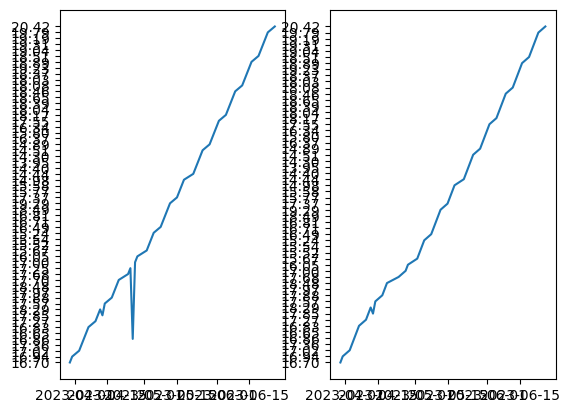

In [9]:
plt.title("Price Change")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tick_params(axis='x', which='both', bottom=True, top=True)
plt.subplot(1, 2, 1)
plt.plot(df['Now'])
df=df.drop([pd.to_datetime('2023-04-20'),pd.to_datetime('2023-04-25'),pd.to_datetime('2023-04-26')])
plt.subplot(1, 2, 2)
plt.plot(df['Now'])

So we see that there is a extraordinary decrease in share the date between 20/04- 26/04. And we drop this rows from dataset.

8-DATA CLASSSFYING

We have independent and dependent variables for prediction. 
As we have more than one variable this time series prediction(TSP) is called as multivariate time series.

In [10]:
#DATA CLASSIFYING FOR INDEPENDENT AND DEPENDENT VARIABLE
ind_col=['Start','Heigh','Low']
ind_df=df[ind_col].astype(float)
dep_df=df['Now'].astype(float)
#We seperate dataframe by independent variables and dependent variables for TSP.
#And make all columns float for numerical operatio.

9-DATA NORMALIZATION

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ind_df_scaled = scaler.fit_transform(ind_df)
dep_df_scaled = scaler.fit_transform(dep_df.values.reshape(-1, 1))
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 4# Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(ind_df) - n_future +2):#(4,21,)
    if i==(len(df)-n_future+1):
        trainX.append(ind_df_scaled[i - n_past:i, 0:ind_df.shape[1]])
    else:
        trainX.append(ind_df_scaled[i - n_past:i, 0:ind_df.shape[1]])
        trainY.append(dep_df_scaled[i + n_future - 1:i + n_future, 0])
        
trainX, trainY = np.array(trainX), np.array(trainY)
trainX_train=trainX[0:(len(trainX)-1)]
print('trainX shape == {}.'.format(trainX_train.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (55, 4, 3).
trainY shape == (55, 1).


This step is used for data grouping by independent and dependent variable. We make all data to appropriate by past n timestamps independent variables for next dependent variable.

MODEL SELECTION

10-MODEL SELECTING AND EVALUATION

RNN Modelinin oluşturulması

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout, SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, input_shape=(trainX_train.shape[1], trainX_train.shape[2])))  # SimpleRNN katmanı
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))  # Çıktı katmanı

# Modelin Compilation
model.compile(loss='mse', optimizer='adam')


Model consist of A sequantial simpleRNN layer with 64 units. Number of units should be selected in compatible with datasets. If a large number of units are selected then, you may have overfitting problem.
And model also one Dropout layer and Dense layer, this are used to overcome overfitting problems and take a appropriate output number. 

MODEL COMPILATION

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

As known recursive neural networks updates the weight matrix in the hidden and output function for each timestamp, and optimizer use different methods. Adam is one of the most popular one by SGD. For a second parameter it calculate mse to compute backpropagation.  

MODEL TRAINING

Epoch 1/10
4/4 - 2s - loss: 0.0819 - val_loss: 0.0100 - 2s/epoch - 463ms/step
Epoch 2/10
4/4 - 0s - loss: 0.0565 - val_loss: 0.0392 - 58ms/epoch - 15ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0311 - val_loss: 0.0182 - 49ms/epoch - 12ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0484 - val_loss: 0.0261 - 52ms/epoch - 13ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0471 - val_loss: 0.0395 - 57ms/epoch - 14ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0389 - val_loss: 0.0224 - 47ms/epoch - 12ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0317 - val_loss: 0.0454 - 53ms/epoch - 13ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0475 - val_loss: 0.0355 - 54ms/epoch - 14ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0262 - val_loss: 0.0063 - 46ms/epoch - 12ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0330 - val_loss: 0.0068 - 47ms/epoch - 12ms/step


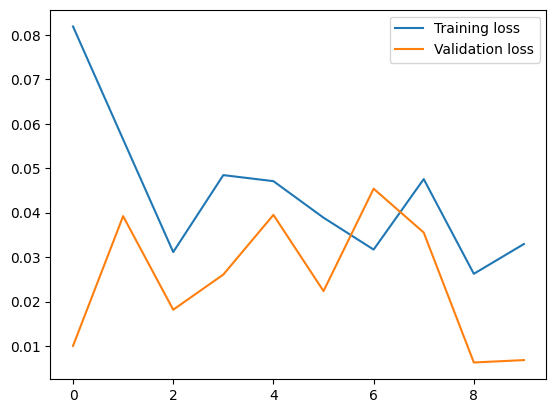

In [14]:
history = model.fit(trainX_train, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

As it is seen in graphics training loss is increasing while validation loss is decreasing in last two epochs. So we can say the model get rid of overfitting.

MODEL PREDICTION

In [15]:


n_days_for_prediction=10  #let us predict past 15 days

predict_dates=pd.date_range((ind_df.index)[-n_days_for_prediction],periods=n_days_for_prediction+1,freq='B')#İlk parametre ilk tarihtir verilen ilk tarih için değil sonraki günler için zaman üretir. Yani indeximizin -15 incisi listedeki ilk tarihtir.
predict_dates=predict_dates[1:]

prediction = model.predict(trainX[-n_days_for_prediction:]) 

prediction=scaler.inverse_transform(prediction)


1/1 [==============================] - 0s 232ms/step


COMPARISION

At last step, we compare the real bank share values by the prediction values. 

In [16]:
# Convert timestamp to date
forecast_dates = []
i=0
for time_i in predict_dates:
    i=i+1
    if i==n_days_for_prediction:
        print(f'The predict now price for {time_i} is {prediction[i-1]} and real value is not known yet.')
    else:   
        forecast_dates.append(time_i.date())
        print(f'The predict now price for {time_i} is {prediction[i-1]} and real value is {df.at[time_i,"Now"]}')



The predict now price for 2023-06-14 00:00:00 is [18.788069] and real value is 18.37
The predict now price for 2023-06-15 00:00:00 is [18.78458] and real value is 19.23
The predict now price for 2023-06-16 00:00:00 is [19.103811] and real value is 18.89
The predict now price for 2023-06-19 00:00:00 is [19.56085] and real value is 18.51
The predict now price for 2023-06-20 00:00:00 is [19.528038] and real value is 19.04
The predict now price for 2023-06-21 00:00:00 is [19.255093] and real value is 19.31
The predict now price for 2023-06-22 00:00:00 is [19.368504] and real value is 19.19
The predict now price for 2023-06-23 00:00:00 is [19.700464] and real value is 19.79
The predict now price for 2023-06-26 00:00:00 is [19.843363] and real value is 20.42
The predict now price for 2023-06-27 00:00:00 is [20.333782] and real value is not known yet.


Note: The real value for the 2023-06-27 day was 20.20 .